## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Installing and Importing the necessary libraries**

In [ ]:
# installing the libraries
!pip install -U sentence-transformers==4.0.2 gensim==4.3.3 transformers==4.50.3 tqdm==4.67.1 scikit-learn==1.6.1 pandas==2.2.2 numpy==1.26.4 matplotlib==3.10.0 seaborn==0.13.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**Note: Kindly restart the session after installing the libraries by clicking Runtime → Restart session. Once the session has restarted, please execute the cells below.**

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [ ]:
# # uncomment and run the following code if Google Colab is being used and the dataset is in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = "/content/drive/MyDrive/AIML UT Austin/Module 6: NLP/Week 5: Project 6 - Stock Market News Sentiment Analysis and Summarization/"
stock_news = pd.read_csv(folder+"stock_news.csv")

In [ ]:
#Creating a copy of the dataset
stock = stock_news.copy()

## **Data Overview**

### Displaying the first few rows of the dataset

In [ ]:
stock.head()

Date                                               News       Open  \
0  2019-01-02   The tech sector experienced a significant dec...  41.740002   
1  2019-01-02   Apple lowered its fiscal Q1 revenue guidance ...  41.740002   
2  2019-01-02   Apple cut its fiscal first quarter revenue fo...  41.740002   
3  2019-01-02   This news article reports that yields on long...  41.740002   
4  2019-01-02   Apple's revenue warning led to a decline in U...  41.740002   

        High        Low      Close     Volume  Label  
0  42.244999  41.482498  40.246914  130672400     -1  
1  42.244999  41.482498  40.246914  130672400     -1  
2  42.244999  41.482498  40.246914  130672400     -1  
3  42.244999  41.482498  40.246914  130672400     -1  
4  42.244999  41.482498  40.246914  130672400     -1

### Understanding the shape of the dataset

In [ ]:
stock.shape

(349, 8)

### Checking the data types of the columns

In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])  # to convert the 'Date' column in the 'stock' DataFrame to datetime format.

### Checking the statistical summary

In [ ]:
stock.describe().T

count                           mean                  min  \
Date      349  2019-02-16 16:05:30.085959936  2019-01-02 00:00:00   
Open    349.0                      46.229233            37.567501   
High    349.0                      46.700458            37.817501   
Low     349.0                      45.745394               37.305   
Close   349.0                      44.926317            36.254131   
Volume  349.0               128948236.103152           45448000.0   
Label   349.0                      -0.054441                 -1.0   

                        25%                  50%                  75%  \
Date    2019-01-14 00:00:00  2019-02-05 00:00:00  2019-03-22 00:00:00   
Open              41.740002            45.974998              50.7075   
High              42.244999            46.025002            50.849998   
Low               41.482498            45.639999              49.7775   
Close             40.246914            44.596924             49.11079   
Volume          103272000.0          115627200.0          151125200.0   
Label                  -1.0                  0.0                  0.0   

                        max              std  
Date    2019-04-30 00:00:00              NaN  
Open              66.817497         6.442817  
High                67.0625         6.507321  
Low               65.862503         6.391976  
Close             64.805229         6.398338  
Volume          244439200.0  43170314.918964  
Label                   1.0         0.715119

### Checking the duplicate values

In [ ]:
stock.duplicated().sum()

0

### Checking for missing values

In [ ]:
stock.isnull().sum()

Date      0
News      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64

## **Exploratory Data Analysis**

### Univariate Analysis

#### Observations on Label

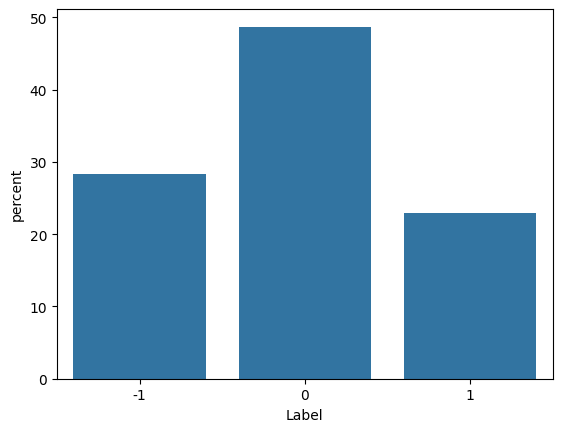

In [ ]:
sns.countplot(data=stock, x="Label", stat="percent");

#### Density Plot of Price (Open,High,Low,Close)

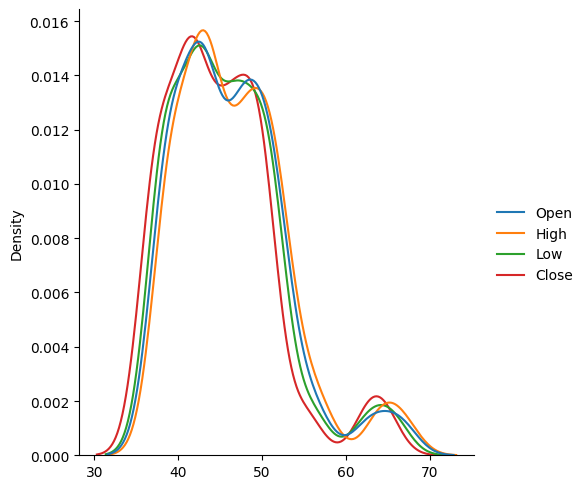

In [ ]:
sns.displot(data=stock[["Open","High","Low","Close"]], kind="kde", palette="tab10");

#### Observations on Volume

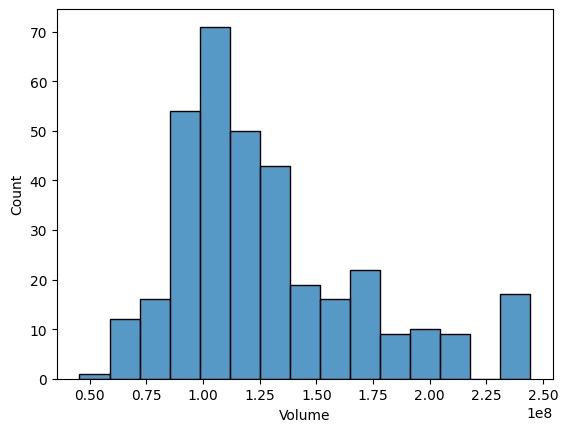

In [ ]:
sns.histplot(stock, x='Volume');

#### Observations on News length

In [ ]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

stock['news_len'].describe().T

count    349.000000
mean      49.312321
std        5.727770
min       19.000000
25%       46.000000
50%       50.000000
75%       53.000000
max       61.000000
Name: news_len, dtype: float64

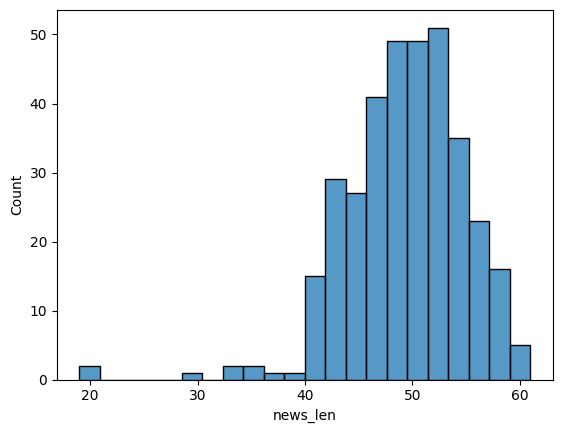

In [ ]:
sns.histplot(data=stock,x="news_len");

### Bivariate Analysis

#### Correlation

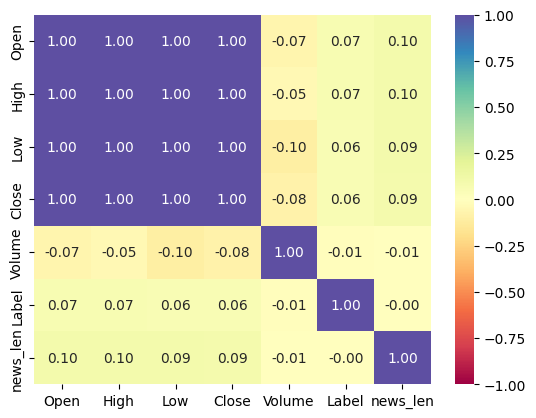

In [ ]:
# plot the correlation matrix for numeric columns only

#sns.heatmap(
#    stock[_____]._____, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
#);

sns.heatmap(
    stock.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

#### Label vs Price (Open, High, Low, Close)

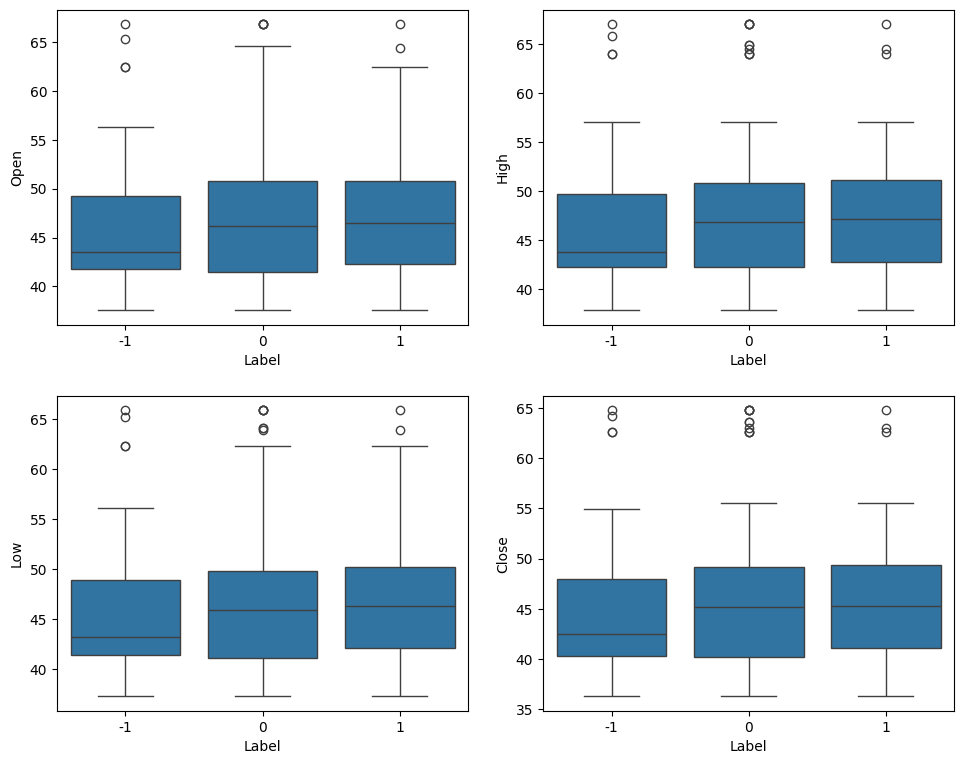

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Label vs Volume

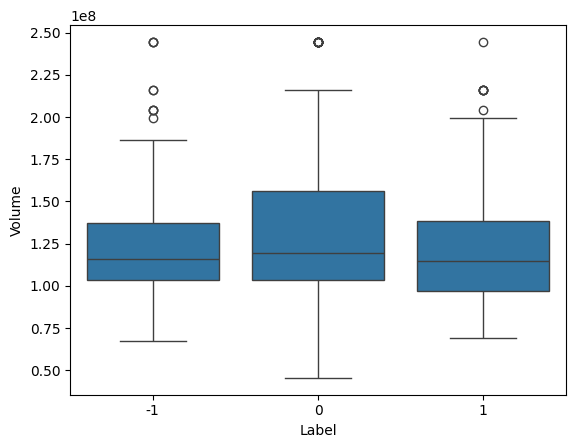

In [ ]:
sns.boxplot(
    data=stock, x="Label", y="Volume"
);

#### Date vs Price (Open, High, Low, Close)

In [ ]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

Open       High        Low      Close       Volume
Date                                                               
2019-01-02  41.740002  42.244999  41.482498  40.246914  130672400.0
2019-01-03  43.570000  43.787498  43.222500  42.470604  103544800.0
2019-01-04  47.910000  47.919998  47.095001  46.419842  111448000.0
2019-01-07  50.792500  51.122501  50.162498  49.110790  109012000.0
2019-01-08  53.474998  54.507500  51.685001  50.787209  216071600.0

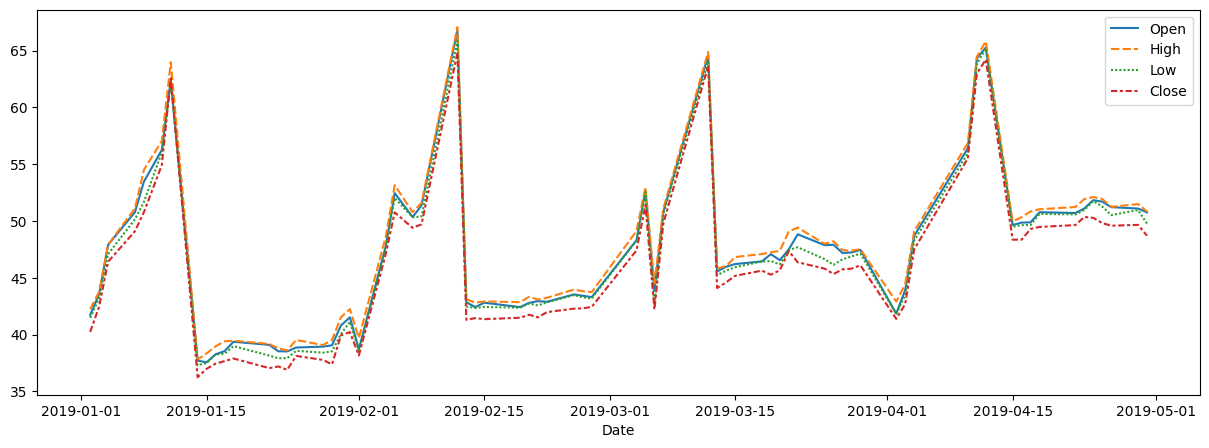

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1));

#### Volume vs Close Price

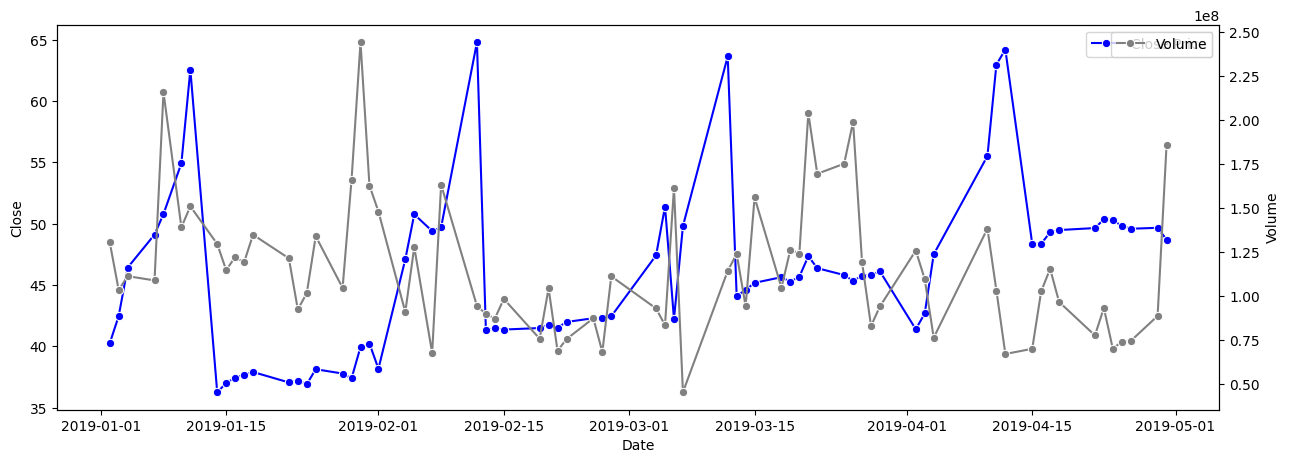

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

## **Data Preprocessing**

In [ ]:
stock["Date"].describe().T

count                              349
mean     2019-02-16 16:05:30.085959936
min                2019-01-02 00:00:00
25%                2019-01-14 00:00:00
50%                2019-02-05 00:00:00
75%                2019-03-22 00:00:00
max                2019-04-30 00:00:00
Name: Date, dtype: object

### Train-test-validation Split

In [ ]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()

In [ ]:
# Complete the code to pick the 'Label' column (the news article sentiment) as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [ ]:
#Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

### Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([-4.16671857e-03,  3.76075543e-02,  8.29352904e-03,  1.15715191e-02,
        1.19493681e-03, -5.72822243e-02,  2.89071370e-02,  8.75151679e-02,
        3.80110089e-03, -2.20239628e-02,  6.09273463e-03, -2.07923707e-02,
       -4.61963983e-03,  1.49190780e-02, -2.56344546e-02, -2.72754356e-02,
        2.32721698e-02, -4.15518600e-03,  6.81763142e-03, -2.47119032e-02,
       -2.27417313e-02,  7.92048313e-03,  2.94765159e-02,  1.48963761e-02,
        2.42676940e-02,  6.34804077e-04, -3.55705097e-02,  8.60667229e-03,
       -2.87020002e-02, -4.13555168e-02,  1.00025618e-02, -2.73517165e-02,
        4.84403362e-03, -8.61608330e-03, -1.52174057e-03,  2.30719801e-02,
        1.25031453e-02, -3.43385190e-02, -2.60082562e-03, -1.23555390e-02,
       -2.02565622e-02,  3.73340910e-03, -8.58407002e-05, -2.07081884e-02,
        1.99248567e-02,  3.79480869e-02,  9.00226831e-03,  1.76263321e-02,
        2.56113417e-04,  2.35361252e-02,  1.19510181e-02, -9.12925415e-03,
       -2.08090805e-02,  

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([-1.1780993e-03,  5.2154846e-03,  3.2370833e-03,  1.9189364e-03,
       -1.1354547e-03, -1.1401728e-02,  6.7142928e-03,  1.5612597e-02,
       -1.9644075e-03, -2.1921368e-03, -2.4236070e-03, -3.4628243e-03,
        7.9962605e-04, -3.0067298e-04, -4.2330478e-03, -1.8037386e-03,
        7.2566741e-03,  1.8788622e-03,  3.7576638e-03, -2.6935330e-03,
       -5.7866750e-03,  2.7902920e-03,  3.9461516e-03, -8.2868297e-04,
        1.2352432e-03, -1.2237050e-03, -7.1422164e-03,  2.2888950e-03,
       -6.6327197e-03, -9.6930191e-03, -1.9794083e-03, -6.5661198e-03,
        2.9356945e-03, -2.6668988e-03, -2.6473403e-03,  5.8756820e-03,
       -1.4936789e-04, -5.3891325e-03, -7.6044766e-05, -2.9493950e-03,
       -5.7890355e-03,  7.9529890e-04,  1.4190356e-03, -3.9056388e-03,
        3.9189095e-03,  3.8169031e-03, -5.8438419e-04,  1.1160767e-03,
       -1.6944899e-05,  1.0380606e-03,  4.6773357e-03, -4.1407500e-03,
       -4.1085151e-03,  4.7848001e-04, -2.8385893e-03,  6.9689797e-03,
      

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.4484853744506836


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


### GloVe

In [ ]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(folder+filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  23.385095596313477


In [ ]:
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(286, 100) (21, 100) (42, 100)


### Sentence Transformer

#### Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#### Encoding the dataset

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device);

cuda


In [ ]:
# encoding the dataset
start = time.time()

X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device)
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device)
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken ",(end-start))

In [ ]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(286, 384) (21, 384) (42, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

### Model Evaluation Criterion

### Utility Functions

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

### Base Model - Word2Vec

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data
#base_wv = GradientBoostingClassifier(random_state = 42)
#base_wv = RandomForestClassifier(random_state=42)
base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

DecisionTreeClassifier(random_state=42)

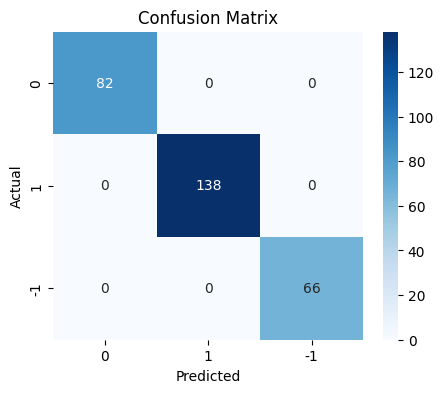

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

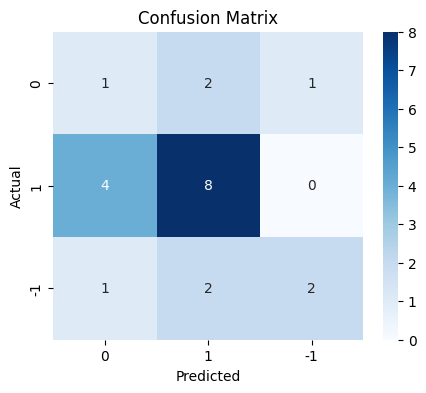

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.52381  0.52381   0.571429  0.538095


### Base Model - GloVe

In [ ]:
#Building the model

#Uncomment only one of the snippets related to fitting the model to the data
#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_gl, y_train) #Complete the code to fit the chosen model on the train data

RandomForestClassifier(random_state=42)

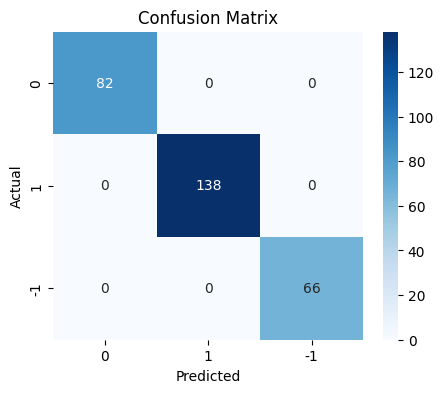

In [ ]:
plot_confusion_matrix(base_wv,X_train_gl,y_train) #Complete the code to plot the confusion matrix for the train data

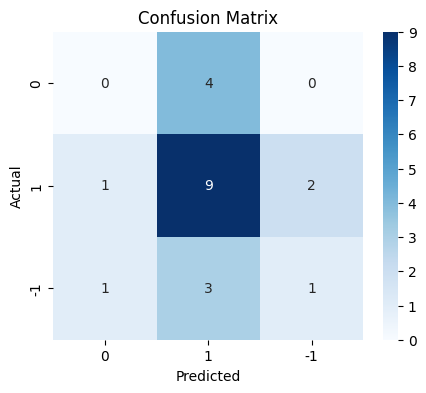

In [ ]:
plot_confusion_matrix(base_wv,X_val_gl,y_val) #Plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_wv,X_train_gl,y_train) #Compute the model performance for the training data
print("Training performance:\n", base_train_gl)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_gl = model_performance_classification_sklearn(base_wv,X_val_gl,y_val) #Compute the model performance for the validation data
print("Validation performance:\n",base_val_gl)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.47619  0.47619   0.400794  0.426871


### Base Model - Sentence Transformer

In [ ]:
# Building the model

#Uncomment only one of the snippets related to fitting the model to the data
#base_wv = GradientBoostingClassifier(random_state = 42)
base_wv = RandomForestClassifier(random_state=42)
#base_wv = DecisionTreeClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_st, y_train) #Fit the chosen model on the train data

RandomForestClassifier(random_state=42)

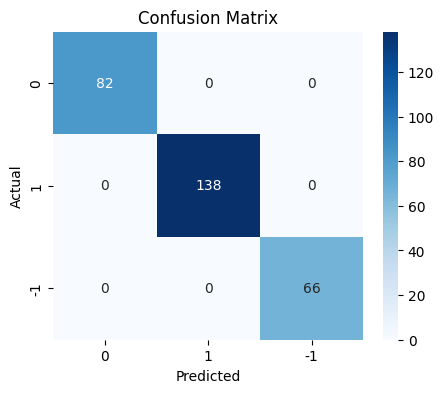

In [ ]:
plot_confusion_matrix(base_wv,X_train_st,y_train) #Plot the confusion matrix for the train data

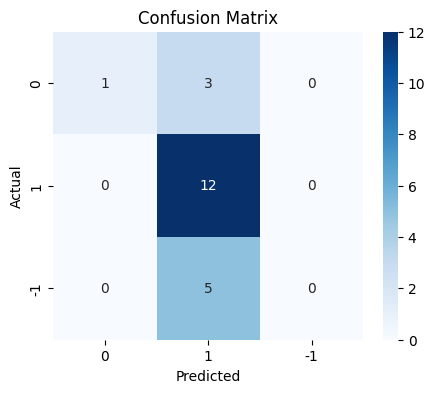

In [ ]:
plot_confusion_matrix(base_wv,X_val_st,y_val) #Plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_wv,X_train_st,y_train) #Compute the model performance for the training data
print("Training performance:\n", base_train_st)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_st = model_performance_classification_sklearn(base_wv,X_val_st,y_val) #Compute the model performance for the validation data
print("Validation performance:\n",base_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.619048  0.619048   0.533333  0.504762


### Tuned Model - Word2Vec

**Note**: The parameter grid provided below is a sample grid. It can be modified depending on the compute power of the system being used.

In [ ]:
start = time.time()

# Choose the type of classifier.
#Uncomment only one of the snippets corrrsponding to the base model trained previously
#tuned_wv = GradientBoostingClassifier(random_state = 42)  #F1 0.354
tuned_wv = RandomForestClassifier(random_state=42)        #F1 0.392
#tuned_wv = DecisionTreeClassifier(random_state=42)        #F1 0.338

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  34.30137658119202


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=6, max_features=0.4, min_samples_split=7,
                       random_state=42)

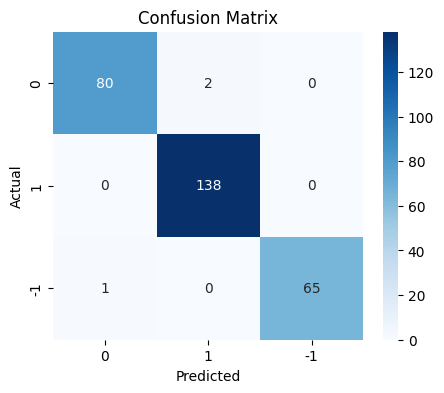

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

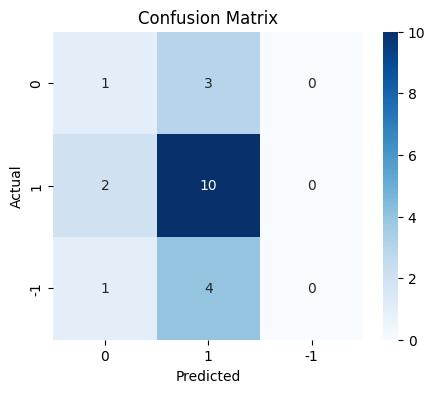

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy   Recall  Precision       F1
0   0.98951  0.98951   0.989567  0.98949


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy   Recall  Precision        F1
0   0.52381  0.52381   0.383754  0.441708


### Tuned Model - GloVe

In [ ]:
start = time.time()

#Uncomment only one of the snippets corrrsponding to the base model trained previously

#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  18.21208906173706


In [ ]:
# Fit the best algorithm to the data.
tuned_gl.fit(X_train_gl, y_train) #Fit the chosen model on the train data

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=7,
                       random_state=42)

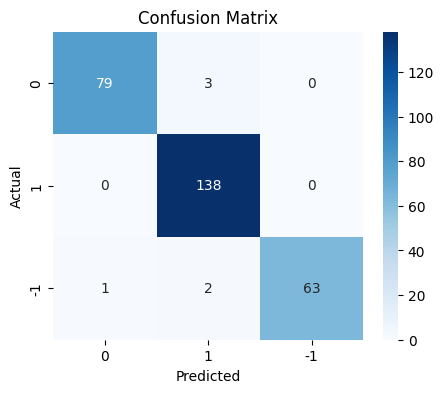

In [ ]:
plot_confusion_matrix(tuned_gl, X_train_gl, y_train) #Plot the confusion matrix for the train data

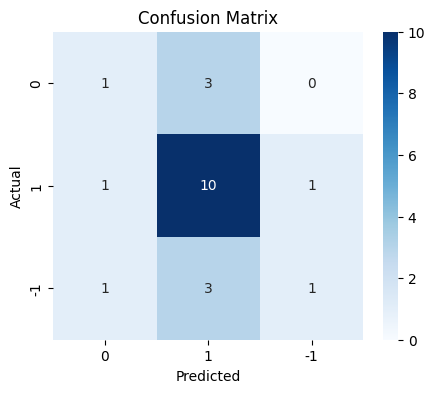

In [ ]:
plot_confusion_matrix(tuned_gl, X_val_gl, y_val) #Complete the code to plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_gl=model_performance_classification_sklearn(tuned_gl, X_train_gl, y_train) #Compute the model performance for the training data
print("Training performance:\n",tuned_train_gl)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.979021  0.979021   0.979545  0.978968


In [ ]:
#Calculating different metrics on validation data
tuned_val_gl = model_performance_classification_sklearn(tuned_gl, X_val_gl, y_val) #Compute the model performance for the validation data
print("Validation performance:\n",tuned_val_gl)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.539683  0.530612


### Tuned Model - Sentence Transformer

In [ ]:
start = time.time()

# Choose the type of classifier.

#Uncomment only one of the snippets corrrsponding to the base model trained previously
#tuned_wv = GradientBoostingClassifier(random_state = 42)
tuned_wv = RandomForestClassifier(random_state=42)
#tuned_wv = DecisionTreeClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) #Pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  36.92836952209473


In [ ]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train) #Fit the chosen model on the train data

RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=11,
                       random_state=42)

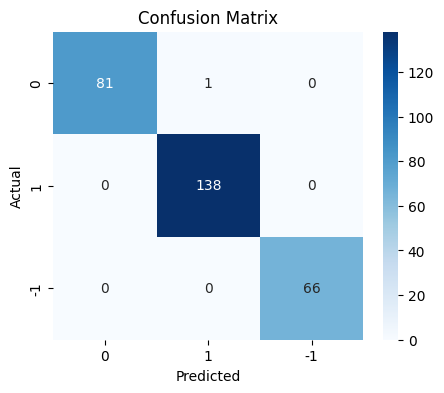

In [ ]:
plot_confusion_matrix(tuned_st,X_train_st,y_train) #Plot the confusion matrix for the train data

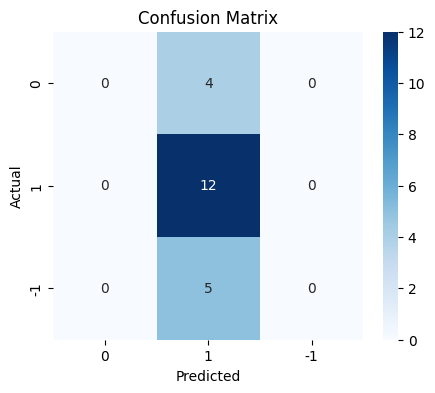

In [ ]:
plot_confusion_matrix(tuned_st,X_val_st,y_val) #Plot the confusion matrix for the validation data

In [ ]:
#Calculating different metrics on training data
tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train) #Compute the model performance for the training data
print("Training performance:\n",tuned_train_st)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.996503  0.996503   0.996529  0.996499


In [ ]:
#Calculating different metrics on validation data
tuned_val_st = model_performance_classification_sklearn(tuned_st,X_val_st,y_val) #Compute the model performance for the validation data
print("Validation performance:\n",tuned_val_st)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.571429  0.571429   0.326531  0.415584


### Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Base Model (Word2Vec)  Base Model (GloVe)  \
Accuracy                     1.0                 1.0   
Recall                       1.0                 1.0   
Precision                    1.0                 1.0   
F1                           1.0                 1.0   

           Base Model (Sentence Transformer)  Tuned Model (Word2Vec)  \
Accuracy                                 1.0                0.989510   
Recall                                   1.0                0.989510   
Precision                                1.0                0.989567   
F1                                       1.0                0.989490   

           Tuned Model (GloVe)  Tuned Model (Sentence Transformer)  
Accuracy              0.979021                            0.996503  
Recall                0.979021                            0.996503  
Precision             0.979545                            0.996529  
F1                    0.978968                            0.996499

In [ ]:
#validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Base Model (Word2Vec)  Base Model (GloVe)  \
Accuracy                0.523810            0.476190   
Recall                  0.523810            0.476190   
Precision               0.571429            0.400794   
F1                      0.538095            0.426871   

           Base Model (Sentence Transformer)  Tuned Model (Word2Vec)  \
Accuracy                            0.619048                0.523810   
Recall                              0.619048                0.523810   
Precision                           0.533333                0.383754   
F1                                  0.504762                0.441708   

           Tuned Model (GloVe)  Tuned Model (Sentence Transformer)  
Accuracy              0.571429                            0.571429  
Recall                0.571429                            0.571429  
Precision             0.539683                            0.326531  
F1                    0.530612                            0.415584

### Model Performance Check on Test Data

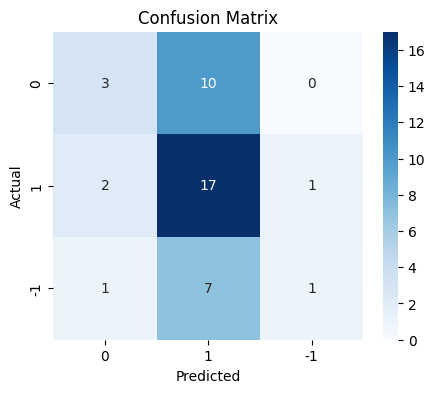

In [ ]:
plot_confusion_matrix(tuned_gl,X_test_gl,y_test) #Plot the confusion matrix for the final model and test data

In [ ]:
#Calculating different metrics on training data
final_model_test = model_performance_classification_sklearn(tuned_gl,X_test_gl,y_test) #Compute the final model's performance for the test data
print("Test performance for the final model:\n",final_model_test)

Test performance for the final model:
    Accuracy  Recall  Precision        F1
0       0.5     0.5        0.5  0.436529


## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

Fri Apr 11 02:33:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P0             29W /   70W |     334MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder = "/content/drive/MyDrive/AIML UT Austin/Module 6: NLP/Week 5: Project 6 - Stock Market News Sentiment Analysis and Summarization/"
stock_news = pd.read_csv(folder+"stock_news.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = stock_news.copy()

#### Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

model_path = hf_hub_download(
    repo_id=model_name_or_path, # The repo_id
    filename=model_basename # The filename
)

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
# uncomment and run the following code in case GPU is not being used

# llm = Llama(
#     model_path=model_path,
#     n_ctx=4500, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

#### Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

Date                                               News
0  2019-01-06   The tech sector experienced a significant dec...
1  2019-01-13   Sprint and Samsung plan to release 5G smartph...
2  2019-01-20   The U.S. stock market declined on Monday as c...
3  2019-01-27   The Swiss National Bank (SNB) governor, Andre...
4  2019-02-03   Caterpillar Inc reported lower-than-expected ...
5  2019-02-10   The Dow Jones Industrial Average, S&P 500, an...
6  2019-02-17   This week, the European Union's second highes...
7  2019-02-24   This news article discusses progress towards ...
8  2019-03-03   The Dow Jones Industrial Average and other ma...
9  2019-03-10   Spotify, the world's largest paid music strea...
10 2019-03-17   The United States opposes France's digital se...
11 2019-03-24   Facebook's stock price dropped more than 3% o...
12 2019-03-31   This news article reports that the S&P 500 In...
13 2019-04-07   Apple and other consumer brands, including LV...
14 2019-04-14   In March, mobile phone shipments to China dro...
15 2019-04-21   The chairman of Taiwan's Foxconn, Terry Gou, ...
16 2019-04-28   Taiwan's export orders continued to decline f...
17 2019-05-05   Spotify reported better-than-expected Q1 reve...

In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
#Defining the response function
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=1024, #Set the maximum number of tokens the model should generate for this task.
      temperature=0, #Set the value for temperature.
      top_p=0.1, #Set the value for top_p
      top_k=50, #Set the value for top_k
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

In [ ]:
news = data_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
#Define the prompt for this task
prompt = """
    Your role is as an expert financial analyst specializing in stock market and economy news analysis.
    Assess the overall sentiment of each news article and classify it into one of the following categories:
    - "Positive"
    - "Negative"
    - "Neutral"

    After that is complete, identify the up to the top three positive events for the stock price (there can be between 0 and 3) and
    up to the top three negative events for the stock price (there can be between 0 and 3).

    Return the output in the specified JSON format, ensuring consistency and providing proper formatting.
    Ensure that all values in the JSON are formatted as strings.
    The format of the key name must be labeled exactly in the provided format and not altered, do not add a number for the week to the key.
    The value in the key-value pair is to be provided by you.
    Do not add any additional key-value pairs; only use what is specified for positive and negative events, do not include neutral events.
    This is the JSON format you should return which shows the key-value pairs (the key name should be exactly as it is here with no alterations):
    {
        "Week Positive Events": ["your_sentiment_prediction",]
        "Week Negative Events": ["your_sentiment_prediction",]
    }

    Only return the JSON, do NOT return any other text or information. Make sure the JSON is valid and well-formatted.
"""

In [ ]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

 {
        "Week Negative Events": ["Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales.",
                                "Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades.",
                                "Apple Inc. lowered its quarterly sales forecast for the fiscal first quarter, underperforming analysts' expectations due to slowing Chinese economy and trade tensions."],
        "Week Positive Events": ["Roku Inc has announced plans to offer premium video channels on a subscription basis through its free streaming service, The Roku Channel.",
                                "Apple CEO Tim Cook discussed the company's Q1 warning on CNBC, attributing US-China trade tensions as a factor but also mentioning projected Services revenue exceeding $10.8 billion in Q1."]
      }
CPU times: user 1min 35s, 

##### Checking the model output on the weekly data

In [ ]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x).replace('\n', ''))

100%|██████████| 18/18 [03:02<00:00, 10.12s/it]

CPU times: user 11min 7s, sys: 26.4 s, total: 11min 33s
Wall time: 3min 2s


In [ ]:
data_1["Key Events"].head() #Print the first 5 rows of the 'Key Events' column

0     {        "Week Negative Events": ["Apple lowe...
1     {        "Week Positive Events": ["AMS develo...
2     {        "Week Negative Events": ["U.S. stock...
3     {        "Week Positive Events": ["IBM's bett...
4     {        "Week Positive Events": ["Apple repo...
Name: Key Events, dtype: object

##### Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

Date                                               News  \
0 2019-01-06   The tech sector experienced a significant dec...   
1 2019-01-13   Sprint and Samsung plan to release 5G smartph...   
2 2019-01-20   The U.S. stock market declined on Monday as c...   
3 2019-01-27   The Swiss National Bank (SNB) governor, Andre...   
4 2019-02-03   Caterpillar Inc reported lower-than-expected ...   

                                          Key Events  \
0   {        "Week Negative Events": ["Apple lowe...   
1   {        "Week Positive Events": ["AMS develo...   
2   {        "Week Negative Events": ["U.S. stock...   
3   {        "Week Positive Events": ["IBM's bett...   
4   {        "Week Positive Events": ["Apple repo...   

                               model_response_parsed  
0  {'Week Negative Events': ['Apple lowered its f...  
1  {'Week Positive Events': ['AMS develops new 3D...  
2  {'Week Negative Events': ['U.S. stock market d...  
3  {'Week Positive Events': ['IBM's better-than-e...  
4  {'Week Positive Events': ['Apple reported stro...

In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

Week Negative Events  \
0  [Apple lowered its fiscal Q1 revenue guidance ...   
1  [Geely forecasts flat sales for 2019 due to ec...   
2  [U.S. stock market declined due to concerns ov...   
3  [Swiss National Bank governor's statement on n...   
4  [Caterpillar Inc reported lower-than-expected ...   

                                Week Positive Events Week Neutral Events  
0  [Roku Inc has announced plans to offer premium...                 NaN  
1  [AMS develops new 3D facial recognition featur...                 NaN  
2  [Dialog Semiconductor reported fourth quarter ...                 NaN  
3  [IBM's better-than-expected earnings and reven...                 NaN  
4  [Apple reported stronger-than-expected earning...                 NaN

In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.head()

Date                                               News  \
0 2019-01-06   The tech sector experienced a significant dec...   
1 2019-01-13   Sprint and Samsung plan to release 5G smartph...   
2 2019-01-20   The U.S. stock market declined on Monday as c...   
3 2019-01-27   The Swiss National Bank (SNB) governor, Andre...   
4 2019-02-03   Caterpillar Inc reported lower-than-expected ...   

                                          Key Events  \
0   {        "Week Negative Events": ["Apple lowe...   
1   {        "Week Positive Events": ["AMS develo...   
2   {        "Week Negative Events": ["U.S. stock...   
3   {        "Week Positive Events": ["IBM's bett...   
4   {        "Week Positive Events": ["Apple repo...   

                               model_response_parsed  \
0  {'Week Negative Events': ['Apple lowered its f...   
1  {'Week Positive Events': ['AMS develops new 3D...   
2  {'Week Negative Events': ['U.S. stock market d...   
3  {'Week Positive Events': ['IBM's better-than-e...   
4  {'Week Positive Events': ['Apple reported stro...   

                                Week Negative Events  \
0  [Apple lowered its fiscal Q1 revenue guidance ...   
1  [Geely forecasts flat sales for 2019 due to ec...   
2  [U.S. stock market declined due to concerns ov...   
3  [Swiss National Bank governor's statement on n...   
4  [Caterpillar Inc reported lower-than-expected ...   

                                Week Positive Events Week Neutral Events  
0  [Roku Inc has announced plans to offer premium...                 NaN  
1  [AMS develops new 3D facial recognition featur...                 NaN  
2  [Dialog Semiconductor reported fourth quarter ...                 NaN  
3  [IBM's better-than-expected earnings and reven...                 NaN  
4  [Apple reported stronger-than-expected earning...                 NaN

In [ ]:
final_output.drop(['Key Events','model_response_parsed', 'Week Neutral Events'], axis=1, inplace=True)
final_output.head()

Date                                               News  \
0 2019-01-06   The tech sector experienced a significant dec...   
1 2019-01-13   Sprint and Samsung plan to release 5G smartph...   
2 2019-01-20   The U.S. stock market declined on Monday as c...   
3 2019-01-27   The Swiss National Bank (SNB) governor, Andre...   
4 2019-02-03   Caterpillar Inc reported lower-than-expected ...   

                                Week Negative Events  \
0  [Apple lowered its fiscal Q1 revenue guidance ...   
1  [Geely forecasts flat sales for 2019 due to ec...   
2  [U.S. stock market declined due to concerns ov...   
3  [Swiss National Bank governor's statement on n...   
4  [Caterpillar Inc reported lower-than-expected ...   

                                Week Positive Events  
0  [Roku Inc has announced plans to offer premium...  
1  [AMS develops new 3D facial recognition featur...  
2  [Dialog Semiconductor reported fourth quarter ...  
3  [IBM's better-than-expected earnings and reven...  
4  [Apple reported stronger-than-expected earning...

## **Conclusions and Recommendations**



* The AI team has built an LLM to assist financial analysts and increase the efficiency and effectiveness of their day-to-day activities
* It will help them to quickly sift through and accurately interpret news and media reports’ potential positive or negative impact on stock prices and the market
* We recommend running a 30 day pilot with a subset of analysts to understand and measure the impact the model has on their investment strategies




